# 6. Maximum Likelihood 

<div class="alert alert-block alert-warning">
<b> Intended learning objectives:</b> 
    
By the end of this session you will be able to:
 * Derive the likelihood and log-likelihood functions given an i.i.d. sample
 * Derive maximum likelihood estimator from single and multi-parameter distributions given an i.i.d. sample
 * Describe the main properties of MLEs    
</div>

## 6.1 Maximum Likelihood estimation 

In inferential statistics, the problem we are often faced is this: we have collected some data, and we have a statistical model for how this data was generated. However, we do not know what the values of the parameters of this model are. We need to find a way to estimate these parameters. In Session 5, we were introduced to the likelihood function, ${L}(\theta | x)$. It measures how consistent different values of the parameter $\theta$ are with the data that we observe. We then looked at how you can use calculus to obtain the maximum likelihood estimator for the parameter.    

So far, we only looked at examples where our data consists of one observation - surely, this is not a sufficient sample size! We will now consider the more realistic scenario, where we have a random sample of observations from a particular distribution - in this case, we say that the sample is independently and identically distributed (i.i.d). We will see what the likelihood function looks like for $n$ i.i.d observations, and how we can obtain the maximum likelihood estimator. We will also demonstrate some important properties of maximum likelihood estimators. 

## 6.2 Likelihood and log-likelihood with $n$ independent observations

Suppose that you collect a sample of $n$ observations. If the $n$ observations are independent, then the joint likelihood function from these $n$ observations has a very convenient form; it is the product of the likelihood from each observation. If $X_1,..., X_n$ are i.i.d., and we observe a sample $\mathbf{x} = \left\{ x_1, x_2, ..., x_n \right\}$: 

\begin{align*}
L \left( \theta \mid \mathbf{x} \right) &=  L\left( \theta \mid x_1 \right) L\left( \theta \mid x_2 \right) ...  L \left( \theta \mid x_n \right) \\
 &= \prod_{i=1}^n  L\left( \theta \mid x_i \right)
\end{align*}.

Recall that we often prefer to work with the log-likelihood function, as it simplifies the algebra when it comes to finding the MLE. The log-likelihood function for $n$ independent observations is:
\begin{align*}
l \left( \theta \mid \mathbf{x} \right) 
 &= log \prod_{i=1}^n L\left( \theta \mid x_i \right) \\
  &= \sum_{i=1}^n log L\left( \theta \mid x_i \right) \\
   &= \sum_{i=1}^n l\left( \theta \mid x_i \right) \\
\end{align*}

Finding the MLE involves the same three steps as we saw in Session 5, but the log-likelihood function is now a joint function for the $n$ observations:

<div class="alert alert-success">
    
<b> Method for finding MLEs:</b>   
1.  Obtain the derivative of the log-likelihood: $\frac{d l(\theta \mid \mathbf{x})}{d \theta}$  
2.  Set $\frac{d l(\theta \mid \mathbf{x})}{d \theta}=0$ and solve for $\theta$   
3.  Verify that it is a maximum by showing that the second derivative $\frac{d ^2 l(\theta \mid  \mathbf{x})}{d \theta ^2 }$ is negative when the MLE is substituted for $\theta$.    
    
</div>

## 6.3 Example: Exponential distribution 
Recall the example from Session 5 on the time that patients wait until their GP appointment in a particular practice. The receptionist records the time that elapses between when a patient walks through the door, and when they are called through for their appointment for a random sample of eight people. These times (in minutes) are: 8.75, 10.20, 15.29, 7.89, 7.04, 12.04, 19.04, 17.50.      

As a reminder, we can model the waiting time until a specific event using the exponential distribution with parameter $\lambda$, which has a probability density function given by:  

\begin{equation}  
f _X\left(x \mid \lambda \right)=\lambda e^{-x\lambda} , x > 0, \lambda > 0  
\end{equation}

*Remember that the mean of this distribution is equal to one over the rate parameter $\lambda$, i.e. $E(X) = \frac{1}{\lambda}$.*

We have that the log-likelihood is: 

\begin{align}
\log L\left( \lambda \mid \mathbf{x} \right) &= \sum_{i=1}^n \log  L(\lambda \mid x_i) \\ 
&= \sum_{i=1}^n \log \left( \lambda e^{-x_i \lambda } \right) \\
&= \sum_{i=1}^n \log \lambda -x_i\lambda \\  
&= n \log \lambda -\lambda \sum_{i=1}^n x_i 
\end{align}

We can make a plot of this log-likelihood, using the data from our example with eight observations. 

[1] 97.75

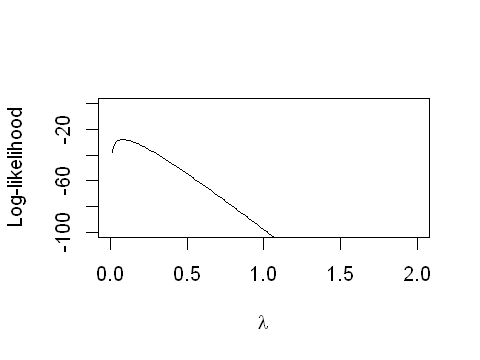

In [8]:
options(repr.plot.width=4, repr.plot.height=3)

#six independent observations for waiting times 
obs <- c(8.75, 10.20, 15.29, 7.89, 7.04, 12.04, 19.04, 17.50)
n <- length(obs)

#possible values for the parameter lambda
lambda <- seq(0, 2, 0.01)

#plot the log-likelihood
plot(lambda, n*log(lambda) - lambda*sum(obs), type="l", xlab= expression(lambda), ylim=c(-100,0),ylab="Log-likelihood")

Graphically, we observe that the maximum is between 0 and 0.25. We will use the three steps, as before, to derive the MLE algebraically:

**Step1**: Taking the derivative of the log-likelihood with respect to $\lambda$:
\begin{equation}
\frac{d log L\left( \lambda \mid x_1 ,..., x_n \right) }{d \lambda} = \frac{n}{\lambda}- \sum_{i=1}^n x_i 
\end{equation}

**Step2:** Set the derivative equal to zero and solve for $\lambda$:
\begin{equation}
0 = \frac{n}{\lambda}- \sum_{i=1}^n x_i 
\end{equation}

\begin{equation}
\hat{\lambda}= \frac{n }{\sum_{i=1}^n x_i} = \frac{1}{\bar{x}}
\end{equation}

The MLE is $\hat{\lambda}= \frac{1}{\bar{x}}$. And to check that this provides a maximum, we go on to the next step:  

**Step3:** Find the second derivative: 

\begin{equation}
\frac{d l^2 \left( \lambda \mid \boldsymbol{x} \right)}{d \lambda ^2} 
= - \frac{n}{\lambda^2}
\end{equation}
When ${\lambda}=\frac{1}{\bar{x}}$, we have: 
\begin{align}
 \frac{d l^2 \left( \lambda \mid \boldsymbol{x} \right)}{d \lambda ^2}  
 &=-n \bar{x}^2
 \end{align}
which is negative. This verifies that we found the maximum likelihood estimate. 

Going back to our example of eight patients waiting for their GP appointment, the maximum likelihood estimate $\lambda$ is given by one over the average of the eight waiting times:

In [9]:
1/mean(obs)

[1] 12.21875

[1] 0.08184143

We have that $\hat{\lambda}=0.0818$ minutes. 

## 6.4 Example: Normal distribution 

We will now consider the normal distribution. Remember that the normal distribution has two parameters, $\mu$ and $\sigma^2$. We will first obtain the MLE for $\mu$ (treating $\sigma^2$ as a constant), and in the practical, we will obtain the MLE for $\sigma^2$ (treating $\mu$ as a constant). Recall that normal distribution has probability density function given by: 

\begin{equation}  
f_X \left( x \mid \mu, \sigma^2 \right)= (2 \pi \sigma^2)^{-\frac{1}{2}} \exp \left\{-\frac{(x-\mu)^2}{2\sigma^2} \right\}
\end{equation}

We have that the log-likelihood given an i.i.d. sample of size $n$ is: 

\begin{align}
l \left(\mu, \sigma^2 \mid  \boldsymbol{x}  \right) &=  \sum_{i=1}^n \log \left\{ (2 \pi \sigma^2)^{-\frac{1}{2}} \exp \left\{-\frac{(x_i-\mu)^2}{2\sigma^2} \right\} \right\} \\
&= \sum_{i=1}^n \left\{ \log (2 \pi \sigma^2)^{-\frac{1}{2}}+ \log \exp  \left\{-\frac{(x_i-\mu)^2}{2\sigma^2} \right\}  \right\} \\
&= \sum_{i=1}^n \left\{ -\frac{1}{2} \log (2 \pi \sigma^2) - \frac{(x_i-\mu)^2}{2\sigma^2}  \right\} \\
&=  {-\frac{n}{2}}\log (2 \pi \sigma^2) -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\mu)^2 
\end{align}

We will first find the MLE for the parameter $\mu$. 

**Step1**: Take the derivative of the log-likelihood with respect to  $\mu$. Note that this requires use of the chain rule:

\begin{align}  
\frac{d l \left(\mu, \sigma^2 \mid  \mathbf{x}  \right) }{d \mu}
&=  -\frac{2}{2\sigma^2}(-1) \sum_{i=1}^n (x_i-\mu) \\
&=  \frac{ \sum_{i=1}^n (x_i-\mu)}{\sigma^2} \\
&=  \frac{ \sum_{i=1}^n x_i-n\mu}{\sigma^2}
\end{align}

**Step2:** Setting the derivative equal to zero and solving for $\mu$:

\begin{align}  
0 &=  \frac{ \sum_{i=1}^n x_i-n\mu}{\sigma^2} \\
\end{align}

Since $\sigma^2 > 0$, we have that: 

\begin{equation}  
0 = \sum_{i=1}^n x_i-n\mu 
\end{equation}


\begin{equation}  
\hat{\mu} =\frac{ \sum_{i=1}^n x_i}{n} = \bar{x}
\end{equation}

We have that the MLE for $\mu$ is the sample mean, $\bar{x}$. 

**Step3:** Find the second derivative: 


\begin{align}  
\frac{d^2 l \left(\mu, \sigma^2 \mid  \mathbf{x}  \right) }{d \mu^2 }
&=  -\frac{n}{\sigma^2},
\end{align}

since both $n>0$ and $\sigma^2 >0$, we have that the second derivative is negative, verifying that we have found the maximum.    


In the practical, we will find the MLE for $\sigma^2$. 

## 6.5 Properties of maximum likelihood estimators
Maximum likelihood estimators can be shown to have some very useful properties. In particular, there are some very important asymptotic properties (properties that we observe as the sample size of our data gets very very large). To explore these properties, have a look at the simulation below. We generate a sample of size 8 from the exponential distribution where $\lambda=12.22$. The MLE is calculated from this sample, by taking its average. We repeat this 100 times, and we plot a histogram of the 100 MLEs that we obtain. Change the sample size, $n$, to larger numbers and see what you notice about the histogram. 

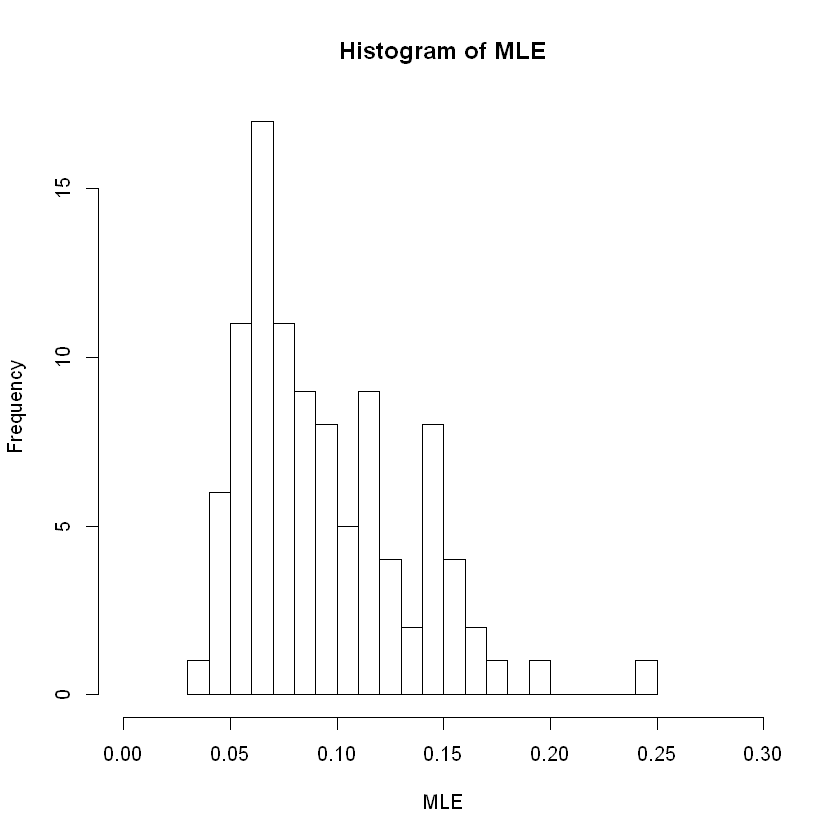

In [1]:
n <- 8  #  make this sample size bigger, and see what happens to the histogram! 

#MLEs will be stored in this vector
mle <- rep(0, 100)

for (i in 1:100){
  #generate a sample of size n from an exponential distribution with lambda=0.0818
  sample <- rexp(n, rate=0.0818)
  #calculate the MLE (the reciprocal mean of the sample) and store it 
  mle[i] <- 1/mean(sample)
}

#plot a histogram of the 100 MLEs 
hist(mle, breaks=20, 
     xlim=c(0, 0.3), 
     main="Histogram of MLE", 
     xlab="MLE")
#add red line to indicate true lambda 
abline(v=12.22, col="red")

You may notice that, as $n$ becomes large, the distribution of the MLE becomes more and more concentrated around the true value, and the histrogram appears to look more bell-shaped.    

Denoting the parameter of interest as $\theta$ and its MLE as $\hat{\theta}$, MLE are: 
1. Asymptotically unbiased: $\mathbb{E}(\hat{\theta}) \rightarrow \theta$ as $n \rightarrow \infty$.
2. Consistent: $\hat{\theta} \rightarrow \theta$ in probability as $n \rightarrow \infty$.
3. Asymptotically efficient: $Var(\hat{\theta})$ is smallest variance amongst all unbiased estimators as $n \rightarrow \infty$.
4. Asymptotically Normal: $\hat{\theta} \sim N(\theta ,Var(\hat{\theta} ))$ as $n \rightarrow \infty$. 
5. Transformation invariant: if $\hat{\theta}$ is the MLE for $\theta$, $g(\hat{\theta})$ is the MLE of $g(\theta)$ for any function $g$. 

The approximate normal distribution of the MLE means that confidence intervals and hypothesis tests for the parameters can be constructed easily. The confidence interval will be the narrowest amongst confidence intervals of estimators that are linear and unbiased. But you might question to what extent these asymptotic properties are useful in practical examples where the sample size is relatively small. Further, in the cases that we have covered so far, it is fairly straightforward to compute the likelihood function and to find the value that maximizes it, but in many situations, this will be a complex task that requires numerical approaches. In Sessions 9 and 10 on Bayesian Statistics, we will see a different paradigm for making inference which can address some of these issues. 

## 6.6 Summary

We now know how to obtain the likelihood and log-likelihood functions when you have an i.i.d. sample of observations. We can then obtain the maximum likelihood estimators of the parameters of the distribution. The MLE is an important tool as it has a number of important asymptotic properties, as we demonstrated using a simulation in R. Finally, we introduced the idea of a log-likelihood ratio, which is a way of comparing estimates of a parameter with the maximum likelihood estimate.   

You may be wondering how you might measure the precision of your estimator. We will cover this in Session 7, where we will meet the concept of confidence intervals. Note that the maximum likelihood estimator, and confidence intervals, are tools from the "frequentist" or "classical" approach to statistics. In Sessions 9 and 10, you will meet the Bayesian approach to statistics, where the Likelihood will also play an important role. 

# Appendix: Extra Reading 


## A1: Log-likelihood ratios

So far we have used the MLE to find an estimate of a parameter. Typically, the estimate is computed from a sample, so if we were to _sample again_ we would expect the estimate to vary a little. But what about others values; what steps are involved to compare other estimates to the MLE? How much would the sample estimates vary? The **log-likelihood ratio (LLR)** is a useful approach. The LLR gives a measure of consistency of a value of $\theta$ relative to the most likely value.

The LLR is defined as,

$$ log\frac{L(\theta)}{L(\hat\theta)} $$

where $L(\theta)$ is the likelihood evaluated at any value, and $L(\hat\theta)$ is the likelihood evaluated at the MLE.

Alternatively, and especially when evaluating in software, the following is used;

$$ LLR(\theta) = l(\theta)-l(\hat\theta) $$

Let's explore the LLR and its properties with an small example.  

For a simple coin-flipping example, from a trial of 10 coin-flips, 4 were heads ($X=4$) and the remainder were tails. From this experiment, we know that the MLE (ie. $\hat\theta$) is 0.4, but we also want to use the LLR to compare other estimates of $\theta$. Looking at the LLR graphically we note that the LLR is a negative value, the further away from zero the less consistent the parameter value with to the MLE.

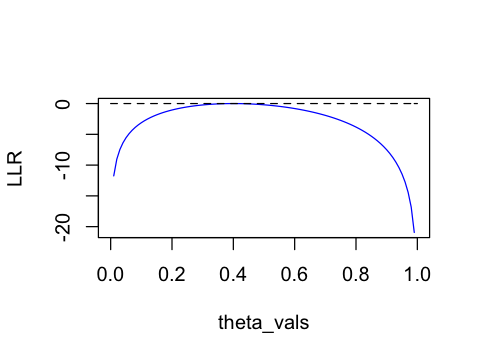

In [1]:
options(repr.plot.width=4, repr.plot.height=3)
 x <- 4; n<-10
 theta_vals <- seq(0,1,0.01)
 LLR <- dbinom(x,n,theta_vals,log=T)-dbinom(x,n,x/n,log=T)
 plot(theta_vals,LLR,type='l',col='blue')
# add additional things
lines(x=theta_vals,y=rep(0,length(theta_vals)),lty=2)

In the above experiment, for a _fair_ coin it would not be unusual to observe 4 heads from 10 trials. The MLE is 0.4 but we _know_ for a fair coin that the true parameter $\pi$ will be 0.5. The MLE is a *sample* of the distribution for $\pi$. So let's zoom in on the figure previously generated;

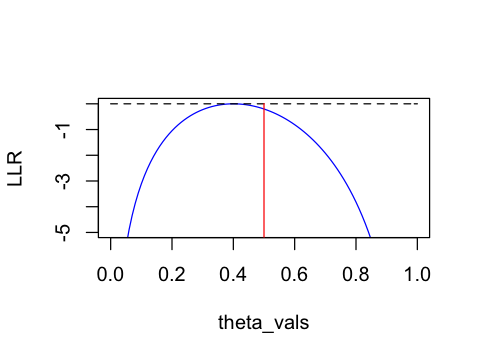

In [2]:
options(repr.plot.width=4, repr.plot.height=3)
 x <- 4; n<-10
 theta_vals <- seq(0,1,0.01)
 LLR <- dbinom(x,n,theta_vals,log=T)-dbinom(x,n,x/n,log=T)
 plot(theta_vals,LLR,type='l',col='blue',ylim=c(-5,0.01))
# add additional things
lines(x=theta_vals,y=rep(0,length(theta_vals)),lty=2)
lines(x=rep(0.5,2),y=c(-10,0.01),col='red',lty=1)

We can see in the figure (red line) that when $\theta=0.5$ the LLR is very close to 0. Values of $\theta$ further away from the MLE than 0.5 will have a even lower LLR. So we can make qualitative statements using the LLR in relation to the MLE. 

Let's increase the sample size and observe what happens to the LLR.

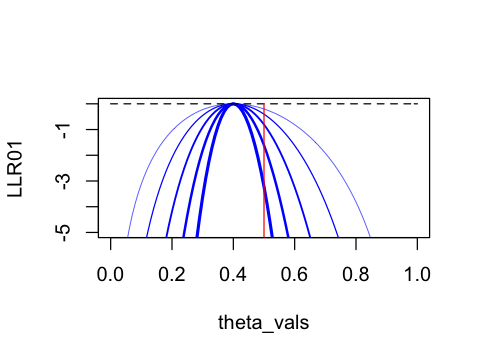

In [3]:
options(repr.plot.width=4, repr.plot.height=3)
 ns<-c(10,20,40,80,160)
# assume we have an 'unfair coin' with heads being more likely than tails
# rather than taking a random sample, assume a sample consistent with the null hypothesis - this is so the MLE remains 0.5
 x1<-round(ns[1]*0.4,0)
 x2<-round(ns[2]*0.4,0)
 x3<-round(ns[3]*0.4,0)
 x4<-round(ns[4]*0.4,0) 
 x5<-round(ns[5]*0.4,0) 
 theta_vals <- seq(0,1,0.01)
 LLR01 <- dbinom(x1,ns[1],theta_vals,log=T)-dbinom(x1,ns[1],x1/ns[1],log=T)
 LLR02 <- dbinom(x2,ns[2],theta_vals,log=T)-dbinom(x2,ns[2],x2/ns[2],log=T)
 LLR03 <- dbinom(x3,ns[3],theta_vals,log=T)-dbinom(x3,ns[3],x3/ns[3],log=T)
 LLR04 <- dbinom(x4,ns[4],theta_vals,log=T)-dbinom(x4,ns[4],x4/ns[4],log=T)
 LLR05 <- dbinom(x5,ns[5],theta_vals,log=T)-dbinom(x5,ns[5],x5/ns[5],log=T)
 plot(theta_vals,LLR01,type='l',col='blue',lwd=0.5,ylim=c(-5,0.01))
# compare to large sample sizes
 lines(theta_vals,LLR02,col='blue',lwd=1)
 lines(theta_vals,LLR03,col='blue',lwd=1.5)
lines(theta_vals,LLR04,col='blue',lwd=2)
lines(theta_vals,LLR05,col='blue',lwd=2.5)
lines(x=theta_vals,y=rep(0,length(theta_vals)),lty=2)
lines(x=rep(0.5,2),y=c(-10,0.01),col='red',lty=1)

At smaller sample sizes the LLR is slightly left skewed when the sample mean is 0.4. As the sample size increases you can see that the LLR becomes more symmetrical about the sample mean, and that the slope of the LLR at values away from the sample mean is steeper. We can start to see the relationship between sample size and the precision of the sample mean. Qualitatively, if we wanted to test whether the coin was fair, it is clear that a larger sample would enable us to have more confidence in our assessment.

Returning to the fact that the data are a sample from a population distribution, we can explore what happens when multiple samples of the same size are drawn. MLE is a sample of the true parameter we can perform the above experiment multiple times and identify the parameters space where the LLR will be zero.

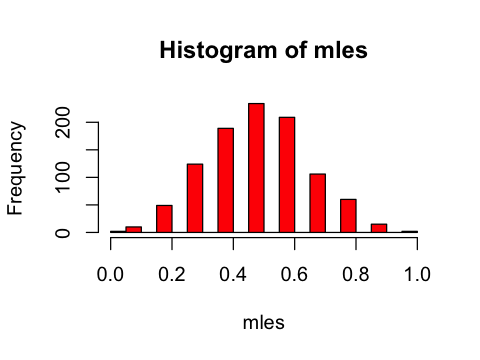

In [4]:
options(repr.plot.width=4, repr.plot.height=3)
 x <- 4; n<-10
 sampl <- rbinom(n=1000,size=n,prob=0.5)
mles <- sampl/n 
 hist(mles,col="red",breaks=30)

From the histogram above you can see that repeating the experiment (different samples) will return different values of the MLE and corresponding LLR. The LLR ratio can be used to assess how consistent different values of the parameter are with the MLE. 

The principles behind the LLR also relate to construction of confidence intervals, which we will cover in Section 08. 